# **Assignment 2.1**

---

## **Problem Statement**
Build a CNN for Cifar10 data

**Importing Neccesary Libraries**

In [1]:
from matplotlib import pyplot as plt
from keras.datasets import cifar10
import numpy as np

In [2]:
import tensorflow as tf

**Task 1**

---


**Load the cifar10 data**

In [3]:
# load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
# summarizing the loaded dataset
print('Train: X= ' , (X_train.shape))
print('Train: y= ' , (y_train.shape))
print('Test:  X= ' , (X_test.shape))
print('Test:  y= ' , (y_test.shape))

Train: X=  (50000, 32, 32, 3)
Train: y=  (50000, 1)
Test:  X=  (10000, 32, 32, 3)
Test:  y=  (10000, 1)


In [18]:
labels = {0:'Airplane', 1:'Automobile', 2:'Bird', 3:'Cat',
          4:'Deer', 5:'Dog',6:'Frog',
          7:'Horse', 8:'Ship', 9:'Truck'
        }

**Task 2** 

---


**Display 10 random cifar images in one grid (subplots)**

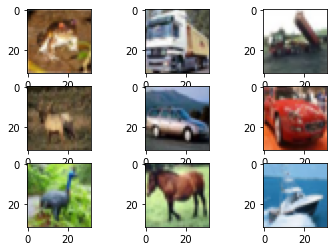

In [5]:
for i in range(9):
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i])
plt.show()

**Normalising the Data**

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

**Task 3**

---

Build 2 Conv2D layer with 2 MaxPooling2D, filter 64, 32, and 16 respectively, padding
true, activation relu, kernel size (3, 3), stride for Conv2d will be 1, for maxpool stride 2 

In [7]:
model = tf.keras.models.Sequential([
                                      tf.keras.layers.InputLayer(input_shape=(32,32,3)),
                                      tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
                                      tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

                                      tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
                                      tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
                                      tf.keras.layers.Dropout(0.25),

                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(512, activation='relu'),
                                      tf.keras.layers.Dense(128, activation='relu'),
                                      tf.keras.layers.Dense(64, activation='relu'),
                                      tf.keras.layers.Dense(32, activation='relu'),
                                      tf.keras.layers.Dropout(0.25),

                                      tf.keras.layers.Dense(len(np.unique(y_train)), activation='softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 8, 8, 32)          0         
                                                                 
 flatten (Flatten)           (None, 2048)              0

**Task 4**

---

**Use RMSprop optimizer, sparse categorical loss, and accuracy, epochs 10**

In [8]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 19s 5ms/step - loss: 1.6296 - accuracy: 0.4141
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2526 - accuracy: 0.5693
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1095 - accuracy: 0.6267
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0264 - accuracy: 0.6582
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9874 - accuracy: 0.6737
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9658 - accuracy: 0.6853
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9624 - accuracy: 0.6901
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9677 - accuracy: 0.6947
Epoch 9/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9762 - accuracy: 0.6955
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.98

**Task 5**

---

**Calculate test set accuracy score and log loss, build confusion matrix**

In [10]:
import numpy as np
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix

In [11]:
prob = model.predict(X_test)
pred = np.argmax(prob, axis=1)

In [12]:
print(accuracy_score(y_test, pred))

0.5999


In [13]:
print(log_loss(y_test, prob))

1.4516605659130108


In [14]:
import seaborn as sns

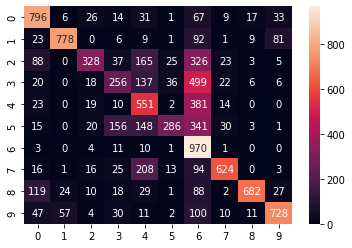

In [15]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g')
plt.show()

**Task 6**

---


**Display 10 random test set cifar images with actual and predicted value (use word cifar labels)** 

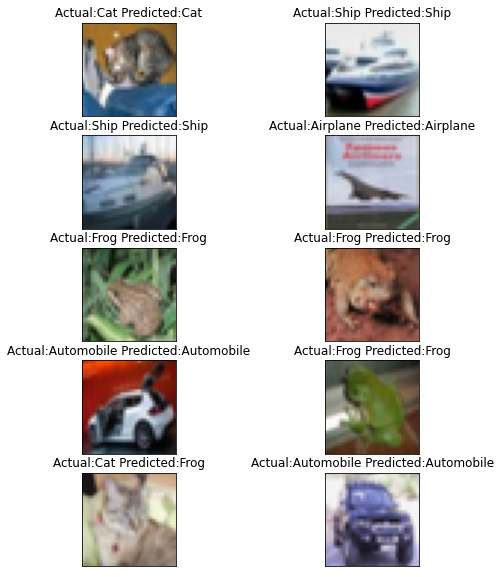

In [19]:
plt.figure(figsize=(8,10))

for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(X_test[i])
    string = "Actual:"+ labels[y_test[i][0]] + " Predicted:" + labels[pred[i]] 
    plt.title(string)
    plt.xticks([])
    plt.yticks([])
    
plt.show()

# **Assignment 2.2**

---
## **Problem Statement**

---


**Build a CNN for Cifar100 data**

In [20]:
from keras.datasets import cifar100

**Task 1**

---
**Load the cifar100 data**


In [21]:
# load dataset
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

169017344/169001437 [==============================] - 2s 0us/step


In [22]:
# summarizing the loaded dataset
print('Train: X= ' , (X_train.shape))
print('Train: y= ' , (y_train.shape))
print('Test:  X= ' , (X_test.shape))
print('Test:  y= ' , (y_test.shape))

Train: X=  (50000, 32, 32, 3)
Train: y=  (50000, 1)
Test:  X=  (10000, 32, 32, 3)
Test:  y=  (10000, 1)


**Task 2**

---
**Build CNN, apply adam optimizer and early stopping callback with epochs 50**


In [23]:
from keras.callbacks import EarlyStopping

In [24]:
model = tf.keras.Sequential([
                            tf.keras.layers.InputLayer(input_shape=(32,32,3)),
                            tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', strides=1, padding='same'),
                            tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'),
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', strides=1, padding='same'),
                            tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(512, activation = 'relu'),
                            tf.keras.layers.Dense(256, activation = 'relu'),

                            tf.keras.layers.Dense(len(np.unique(y_train)), activation = 'softmax')
                             
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2048)             

In [25]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
from keras.callbacks import EarlyStopping

In [27]:
es = EarlyStopping(monitor='accuracy', mode='max', patience = 2)

In [28]:
model.fit(X_train, y_train, epochs=50, callbacks=[es])

Epoch 1/50
1563/1563 [==============================] - 6s 4ms/step - loss: 4.8483 - accuracy: 0.0533
Epoch 2/50
1563/1563 [==============================] - 5s 4ms/step - loss: 3.6014 - accuracy: 0.1551
Epoch 3/50
1563/1563 [==============================] - 5s 4ms/step - loss: 3.2508 - accuracy: 0.2165
Epoch 4/50
1563/1563 [==============================] - 5s 4ms/step - loss: 3.0150 - accuracy: 0.2599
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 2.8246 - accuracy: 0.2966
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 2.6541 - accuracy: 0.3289
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 2.4854 - accuracy: 0.3659
Epoch 8/50
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3161 - accuracy: 0.3995
Epoch 9/50
1563/1563 [==============================] - 5s 3ms/step - loss: 2.1643 - accuracy: 0.4311
Epoch 10/50
1563/1563 [==============================] - 5s 3ms/step - loss: 2.049

**Task 3**

---

**Calculate test set accuracy score and log loss, build confusion matrix**

In [29]:
import numpy as np
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix

In [30]:
prob = model.predict(X_test)
pred = np.argmax(prob, axis=1)

In [31]:
print(log_loss(y_test, prob))

5.558603640272579


In [32]:
print(accuracy_score(y_test, pred))

0.2579


In [33]:
import seaborn as sns

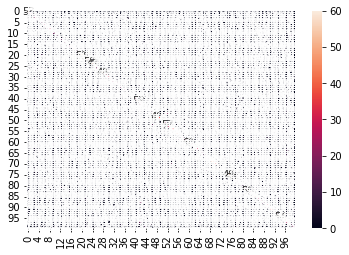

In [34]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g')
plt.show()

In [35]:
from sklearn.metrics import confusion_matrix

In [37]:
confusion_matrix(y_test, pred)

array([[53,  2,  0, ...,  0,  1,  0],
       [ 1, 26,  1, ...,  1,  0,  0],
       [ 2,  0, 12, ...,  2,  7,  0],
       ...,
       [ 0,  0,  0, ..., 26,  0,  0],
       [ 1,  0,  0, ...,  1, 13,  1],
       [ 1,  0,  0, ...,  0,  0, 18]])